In [100]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from collections import Counter, OrderedDict
import seaborn as sns
import pandas as pd

## Loading image files

In [12]:
def load_images(directory):
    class_images = {}
    class_counts = Counter()

    # Iterate through the directory
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            # Get the first image in the class folder
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                if os.path.isfile(img_path):
                    class_images[class_name] = np.array(Image.open(img_path))
                    break
            # Count the number of images in the class
            class_counts[class_name] = len(os.listdir(class_path))


    return class_images, class_counts

In [13]:
train_dir = '/nfs/home/tgv3756/dlproject/data/resnet_train_data'
train_images, train_counts = load_images(train_dir)

In [212]:
list(train_images.values())[0].shape

(480, 640, 3)

In [213]:
# Image dimensions
[Image.fromarray(i).size for i in list(train_images.values())]

[(640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480)]

In [39]:
label_mappings = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5': 'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}

#  Displaying images from each class

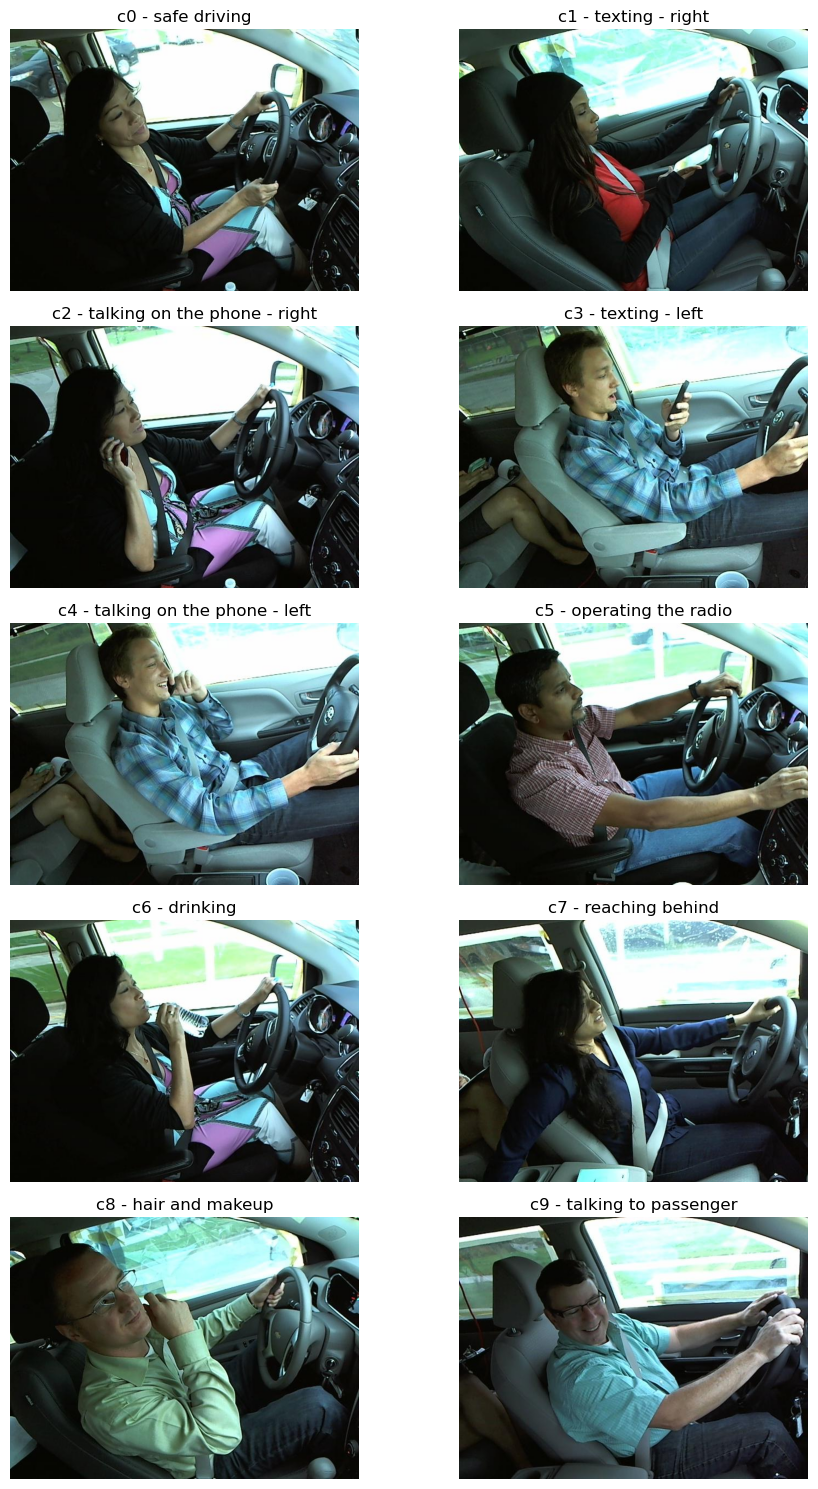

In [76]:
fig, axes = plt.subplots(5, 2, figsize=(10, 15))
for ax, (class_name, img) in zip(axes.flatten(), OrderedDict(sorted(train_images.items())).items()):
    ax.imshow(img)
    ax.set_title(f"{class_name} - {label_mappings.get(class_name)}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Frequency Counts of Training Images

In [171]:
freq = pd.DataFrame({'Class':[label_mappings.get(i) for i in OrderedDict(sorted(train_counts.items())).keys()], 'Frequency' : train_counts.values()})

In [170]:
freq

,Class,Images
0,safe driving,1853
1,texting - right,1703
2,talking on the phone - right,1601
3,texting - left,1849
4,talking on the phone - left,1528
5,operating the radio,1991
6,drinking,1860
7,reaching behind,1813
8,hair and makeup,1860
9,talking to passenger,1876


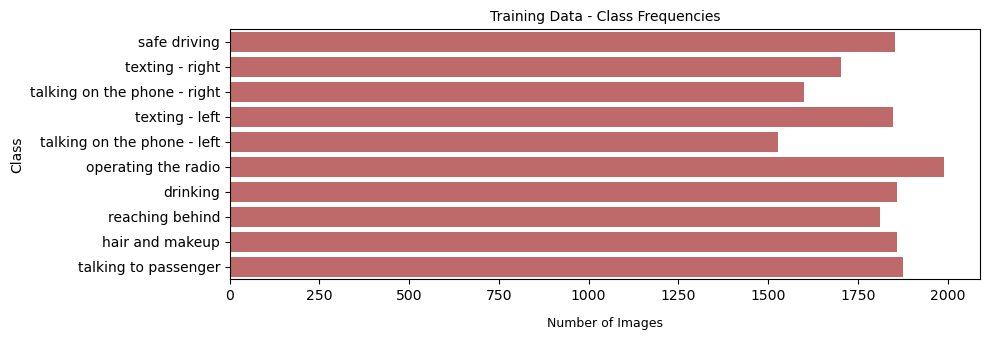

In [177]:
plt.figure(figsize= (10, 3.5))
ax = sns.barplot(data = freq, y = 'Class', x = 'Frequency', color = 'indianred')
plt.xlabel('Number of Images', size = 9, labelpad = 10)
plt.ylabel('Class', size = 10)
plt.title('Training Data - Class Frequencies', size = 10)
plt.xticks(size = 10)
plt.tight_layout()
plt.show()

# Frequency Counts of Validation Images

In [178]:
val_dir = '/nfs/home/tgv3756/dlproject/data/resnet_val_data'
val_images, val_counts = load_images(val_dir)

In [186]:
val_freq = pd.DataFrame({'Class':[label_mappings.get(i) for i in OrderedDict(sorted(val_counts.items())).keys()], 'Frequency' : val_counts.values()})

<AxesSubplot:>

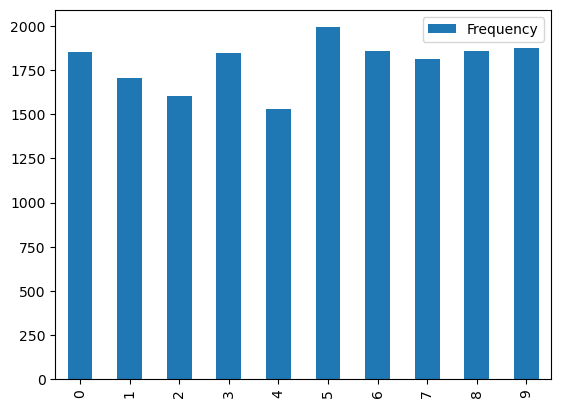

In [193]:
freq.plot.bar()

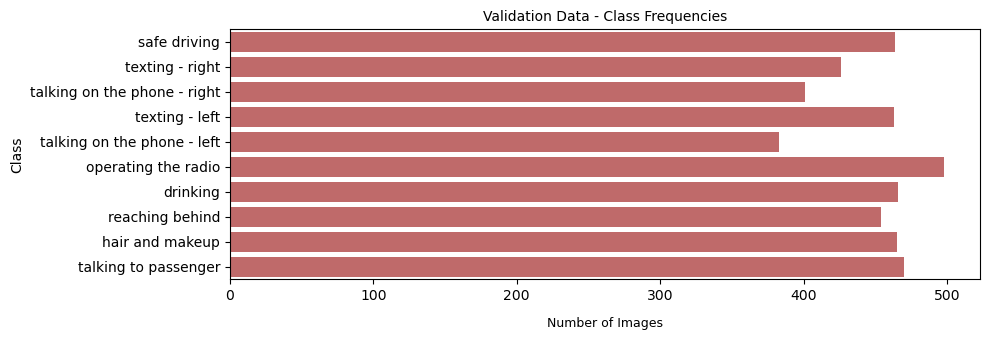

In [187]:
plt.figure(figsize= (10, 3.5))
ax = sns.barplot(data = val_freq, y = 'Class', x = 'Frequency', color = 'indianred')
plt.xlabel('Number of Images', size = 9, labelpad = 10)
plt.ylabel('Class', size = 10)
plt.title('Validation Data - Class Frequencies', size = 10)
plt.xticks(size = 10)
plt.tight_layout()
plt.show()